<a href="https://colab.research.google.com/github/IanLusule/Computer-Science-3.2/blob/main/Copy_of_bottom_up_parsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

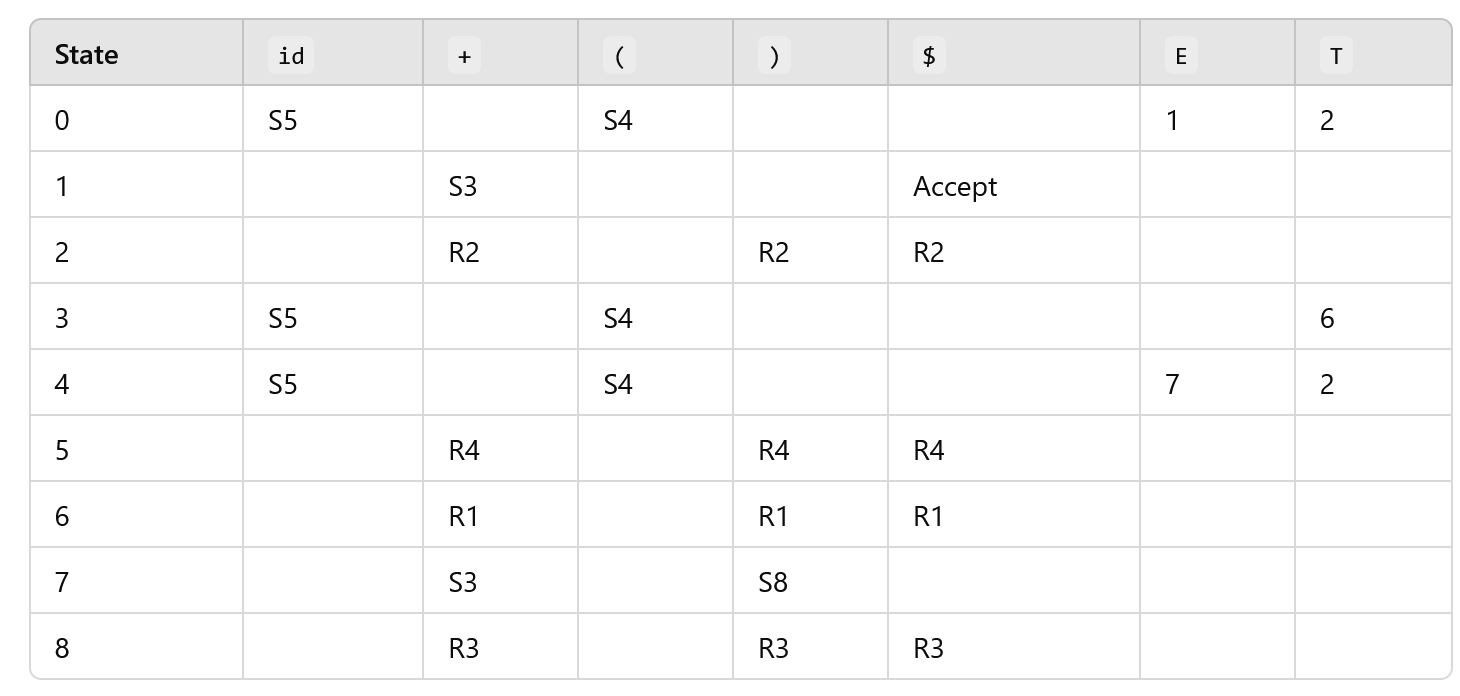

In [ ]:
# Action table as a dictionary of dictionaries
action_table = {
    0: {"id": "S5", "+": None, "(": "S4", ")": None, "$": None},
    1: {"id": None, "+": "S3", "(": None, ")": None, "$": "Accept"},
    2: {"id": None, "+": "R2", "(": None, ")": "R2", "$": "R2"},
    3: {"id": "S5", "+": None, "(": "S4", ")": None, "$": None},
    4: {"id": "S5", "+": None, "(": "S4", ")": None, "$": None},
    5: {"id": None, "+": "R4", "(": None, ")": "R4", "$": "R4"},
    6: {"id": None, "+": "R1", "(": None, ")": "R1", "$": "R1"},
    7: {"id": None, "+": "S3", "(": None, ")": "S8", "$": None},
    8: {"id": None, "+": "R3", "(": None, ")": "R3", "$": "R3"}
}

# Goto table as a dictionary of dictionaries
goto_table = {
    0: {"E": 1, "T": 2},
    1: {"E": None, "T": None},
    2: {"E": None, "T": None},
    3: {"E": None, "T": 6},
    4: {"E": 7, "T": 2},
    5: {"E": None, "T": None},
    6: {"E": None, "T": None},
    7: {"E": None, "T": None},
    8: {"E": None, "T": None}
}

# Grammar rules for reductions
rules = {
    1: ("E", 3),  # E -> E + T
    2: ("E", 1),  # E -> T
    3: ("T", 3),  # T -> ( E )
    4: ("T", 1)   # T -> id
}

def shift_reduce_parser(input_tokens):
    # Append end-of-input symbol
    input_tokens.append("$")

    # Stack for parsing states
    stack = [0]

    index = 0
    print("Stack\t\tInput\t\tAction")
    while True:
        # Get current state from the stack
        state = stack[-1]
        current_token = input_tokens[index]

        action = action_table.get(state, {}).get(current_token)

        if action is None:
            print(f"Error: Unexpected token '{current_token}' at index {index}")
            return False

        # Convert stack to string format for printing
        stack_str = " ".join(map(str, stack))
        input_str = " ".join(input_tokens[index:])

        if action == "Accept":
            print(f"{stack_str}\t\t{input_str}\t\tAccept")
            print("Input accepted!")
            return True
        elif action.startswith("S"):  # Shift operation
            print(f"{stack_str}\t\t{input_str}\t\tShift {current_token}")
            stack.append(current_token)
            stack.append(int(action[1:]))  # Push the new state
            index += 1  # Move to the next input token
        elif action.startswith("R"):  # Reduce operation
            rule_num = int(action[1:])
            lhs, rhs_len = rules[rule_num]
            print(f"{stack_str}\t\t{input_str}\t\tReduce {lhs} -> {''.join(map(str, stack[-2 * rhs_len:][1::2]))}")
            stack = stack[:-2 * rhs_len]  # Pop 2 * rhs_len (states and symbols)
            state = stack[-1]  # New top of the stack
            goto = goto_table[state].get(lhs)
            if goto is not None:
                stack.append(lhs)
                stack.append(goto)
            else:
                print("Error in goto table.")
                return False
        else:
            print("Unexpected action.")
            return False

# Prompt user for input
user_input = input("Enter the input string (tokens separated by spaces, e.g., 'id + id'): ")
input_tokens = user_input.split()
shift_reduce_parser(input_tokens)
id + ( id )

Enter the input string (tokens separated by spaces, e.g., 'id + id'): id 
Stack		Input		Action
0		id $		Shift id
0 id 5		$		Reduce T -> 5
0 T 2		$		Reduce E -> 2
0 E 1		$		Accept
Input accepted!


TypeError: unsupported operand type(s) for +: 'builtin_function_or_method' and 'builtin_function_or_method'

![image.png](
  
)